<a href="https://colab.research.google.com/github/23ME30056/Flight-delay-prediction-large-/blob/main/Flight_Data_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA for Flight delays**

---



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/DelayData.csv'

flight_df = pd.read_csv(path)

pd.set_option('display.max_columns',None)

flight_df.head()

,depdelay,arrdelay,scheduleddepartdatetime,origin,dest,uniquecarrier,marketshareorigin,marketsharedest,hhiorigin,hhidest,nonhubairportorigin,smallhubairportorigin,mediumhubairportorigin,largehubairportorigin,nonhubairportdest,smallhubairportdest,mediumhubairportdest,largehubairportdest,nonhubairlineorigin,smallhubairlineorigin,mediumhubairlineorigin,largehubairlineorigin,nonhubairlinedest,smallhubairlinedest,mediumhubairlinedest,largehubairlinedest,year,month,dayofmonth,dayofweek,scheduledhour,originairportid,destairportid,tailnum,capacity,loadfactor,numflights,origincityname,originstate,distance,monopolyroute,temperature,temp_ninfty_n10,temp_n10_0,temp_0_10,temp_10_20,temp_20_30,temp_30_40,temp_40_infty,windspeed,windspeedsquare,windgustdummy,windgustspeed,raindummy,raintracedummy,snowdummy,snowtracedummy,originmetropop,originmetrogdppercapita,destmetropop,destmetrogdppercapita
0,0,-4.0,08-Jan-2004 15:25:00,ELP,SAT,WN,0.618467,0.407567,0.417090,0.226878,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,2004,1,8,4,15,11540,14683,N686,2,0.460607,19.579,"El Paso, TX",TX,496,1,15.340000,0,0,0,1,0,0,0,10.300000,106.090000,0,0.0,0,0,0,0,702433,27314.633,1843927,35005.234
1,-4,11.0,22-Jan-2004 14:40:00,ATL,MSY,DL,0.500757,0.096321,0.319589,0.196657,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,2004,1,22,4,14,10397,13495,N110DL,2,0.617904,19.548,"Atlanta, GA",GA,425,0,11.500000,0,0,0,1,0,0,0,13.666667,186.777778,0,0.0,0,0,0,0,4802300,49081.773,1314721,48848.234
2,3,12.0,29-Jan-2004 12:25:00,DFW,JFK,DL,0.060898,0.131962,0.296126,0.214357,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,2004,1,29,4,12,11298,12478,N933DL,142,0.455929,19.545,"Dallas/Fort Worth, TX",TX,1391,0,12.218868,0,0,0,1,0,0,0,13.528302,183.014952,0,0.0,0,0,0,0,5689982,50588.563,18747431,57295.402
3,-3,24.0,14-Jan-2004 15:55:00,SEA,EWR,CO,0.040522,0.347744,0.234712,0.249377,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,2004,1,14,3,15,14747,11618,N18243,149,0.534314,19.261,"Seattle, WA",WA,2401,0,9.000000,0,0,1,0,0,0,0,0.000000,0.000000,0,0.0,1,0,0,0,3163703,57755.547,18747431,57295.402
4,0,-8.0,14-Jan-2004 18:40:00,SLC,RNO,OO,0.506899,0.176493,0.341763,0.277364,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,2004,1,14,3,18,14869,14570,N443SW,55,0.742125,19.261,"Salt Lake City, UT",UT,422,0,-11.466667,1,0,0,0,0,0,0,7.666667,58.777778,0,0.0,0,0,0,0,1030597,45043.602,385049,49079.727


In [ ]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201664 entries, 0 to 1201663
Data columns (total 61 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   depdelay                 1201664 non-null  int64  
 1   arrdelay                 1198458 non-null  float64
 2   scheduleddepartdatetime  1201664 non-null  object 
 3   origin                   1201664 non-null  object 
 4   dest                     1201664 non-null  object 
 5   uniquecarrier            1201664 non-null  object 
 6   marketshareorigin        1201664 non-null  float64
 7   marketsharedest          1201664 non-null  float64
 8   hhiorigin                1201664 non-null  float64
 9   hhidest                  1201664 non-null  float64
 10  nonhubairportorigin      1201664 non-null  int64  
 11  smallhubairportorigin    1201664 non-null  int64  
 12  mediumhubairportorigin   1201664 non-null  int64  
 13  largehubairportorigin    1201664 non-null 

In [ ]:
flight_df.shape

(1201664, 61)

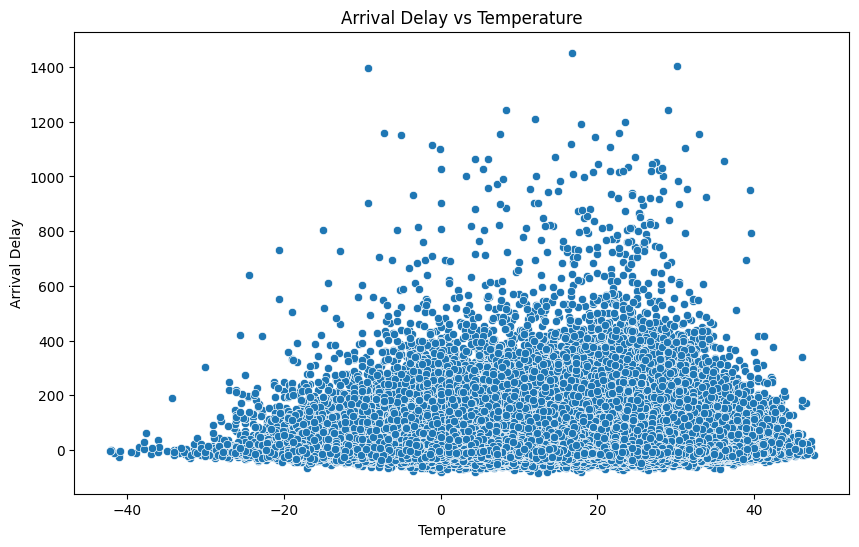

In [ ]:
# prompt: plot for arrival delay vs temperature

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='arrdelay', data=flight_df)
plt.xlabel('Temperature')
plt.ylabel('Arrival Delay')
plt.title('Arrival Delay vs Temperature')
plt.show()

In [ ]:
flight_df['arrdelay'].nunique(dropna=False)

824

In [ ]:
flight_df['scheduleddepartdatetime']= pd.to_datetime(flight_df.scheduleddepartdatetime, dayfirst=True)

flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201664 entries, 0 to 1201663
Data columns (total 61 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   depdelay                 1201664 non-null  int64         
 1   arrdelay                 1198458 non-null  float64       
 2   scheduleddepartdatetime  1201664 non-null  datetime64[ns]
 3   origin                   1201664 non-null  object        
 4   dest                     1201664 non-null  object        
 5   uniquecarrier            1201664 non-null  object        
 6   marketshareorigin        1201664 non-null  float64       
 7   marketsharedest          1201664 non-null  float64       
 8   hhiorigin                1201664 non-null  float64       
 9   hhidest                  1201664 non-null  float64       
 10  nonhubairportorigin      1201664 non-null  int64         
 11  smallhubairportorigin    1201664 non-null  int64         
 12  

In [ ]:
# prompt: count number of nan values in all columns

# Count NaN values in each column
nan_counts = flight_df.isna().sum()
nan_counts

,0
depdelay,0
arrdelay,3206
scheduleddepartdatetime,0
origin,0
dest,0
...,...
snowtracedummy,0
originmetropop,0
originmetrogdppercapita,0
destmetropop,0


In [ ]:
# prompt: drop all rows with nan arrdelay value

flight_df = flight_df.dropna(subset=['arrdelay'])

In [ ]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1198458 entries, 0 to 1201663
Data columns (total 61 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   depdelay                 1198458 non-null  int64         
 1   arrdelay                 1198458 non-null  float64       
 2   scheduleddepartdatetime  1198458 non-null  datetime64[ns]
 3   origin                   1198458 non-null  object        
 4   dest                     1198458 non-null  object        
 5   uniquecarrier            1198458 non-null  object        
 6   marketshareorigin        1198458 non-null  float64       
 7   marketsharedest          1198458 non-null  float64       
 8   hhiorigin                1198458 non-null  float64       
 9   hhidest                  1198458 non-null  float64       
 10  nonhubairportorigin      1198458 non-null  int64         
 11  smallhubairportorigin    1198458 non-null  int64         
 12  mediu

In [ ]:
flight_df.head()

,depdelay,arrdelay,scheduleddepartdatetime,origin,dest,uniquecarrier,marketshareorigin,marketsharedest,hhiorigin,hhidest,nonhubairportorigin,smallhubairportorigin,mediumhubairportorigin,largehubairportorigin,nonhubairportdest,smallhubairportdest,mediumhubairportdest,largehubairportdest,nonhubairlineorigin,smallhubairlineorigin,mediumhubairlineorigin,largehubairlineorigin,nonhubairlinedest,smallhubairlinedest,mediumhubairlinedest,largehubairlinedest,year,month,dayofmonth,dayofweek,scheduledhour,originairportid,destairportid,tailnum,capacity,loadfactor,numflights,origincityname,originstate,distance,monopolyroute,temperature,temp_ninfty_n10,temp_n10_0,temp_0_10,temp_10_20,temp_20_30,temp_30_40,temp_40_infty,windspeed,windspeedsquare,windgustdummy,windgustspeed,raindummy,raintracedummy,snowdummy,snowtracedummy,originmetropop,originmetrogdppercapita,destmetropop,destmetrogdppercapita
0,0,-4.0,2004-01-08 15:25:00,ELP,SAT,WN,0.618467,0.407567,0.417090,0.226878,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,2004,1,8,4,15,11540,14683,N686,2,0.460607,19.579,"El Paso, TX",TX,496,1,15.340000,0,0,0,1,0,0,0,10.300000,106.090000,0,0.0,0,0,0,0,702433,27314.633,1843927,35005.234
1,-4,11.0,2004-01-22 14:40:00,ATL,MSY,DL,0.500757,0.096321,0.319589,0.196657,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,2004,1,22,4,14,10397,13495,N110DL,2,0.617904,19.548,"Atlanta, GA",GA,425,0,11.500000,0,0,0,1,0,0,0,13.666667,186.777778,0,0.0,0,0,0,0,4802300,49081.773,1314721,48848.234
2,3,12.0,2004-01-29 12:25:00,DFW,JFK,DL,0.060898,0.131962,0.296126,0.214357,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,2004,1,29,4,12,11298,12478,N933DL,142,0.455929,19.545,"Dallas/Fort Worth, TX",TX,1391,0,12.218868,0,0,0,1,0,0,0,13.528302,183.014952,0,0.0,0,0,0,0,5689982,50588.563,18747431,57295.402
3,-3,24.0,2004-01-14 15:55:00,SEA,EWR,CO,0.040522,0.347744,0.234712,0.249377,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,2004,1,14,3,15,14747,11618,N18243,149,0.534314,19.261,"Seattle, WA",WA,2401,0,9.000000,0,0,1,0,0,0,0,0.000000,0.000000,0,0.0,1,0,0,0,3163703,57755.547,18747431,57295.402
4,0,-8.0,2004-01-14 18:40:00,SLC,RNO,OO,0.506899,0.176493,0.341763,0.277364,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,2004,1,14,3,18,14869,14570,N443SW,55,0.742125,19.261,"Salt Lake City, UT",UT,422,0,-11.466667,1,0,0,0,0,0,0,7.666667,58.777778,0,0.0,0,0,0,0,1030597,45043.602,385049,49079.727


In [ ]:
flight_df.columns

Index(['depdelay', 'arrdelay', 'scheduleddepartdatetime', 'origin', 'dest',
       'uniquecarrier', 'marketshareorigin', 'marketsharedest', 'hhiorigin',
       'hhidest', 'nonhubairportorigin', 'smallhubairportorigin',
       'mediumhubairportorigin', 'largehubairportorigin', 'nonhubairportdest',
       'smallhubairportdest', 'mediumhubairportdest', 'largehubairportdest',
       'nonhubairlineorigin', 'smallhubairlineorigin',
       'mediumhubairlineorigin', 'largehubairlineorigin', 'nonhubairlinedest',
       'smallhubairlinedest', 'mediumhubairlinedest', 'largehubairlinedest',
       'year', 'month', 'dayofmonth', 'dayofweek', 'scheduledhour',
       'originairportid', 'destairportid', 'tailnum', 'capacity', 'loadfactor',
       'numflights', 'origincityname', 'originstate', 'distance',
       'monopolyroute', 'temperature', 'temp_ninfty_n10', 'temp_n10_0',
       'temp_0_10', 'temp_10_20', 'temp_20_30', 'temp_30_40', 'temp_40_infty',
       'windspeed', 'windspeedsquare', 'windgustd

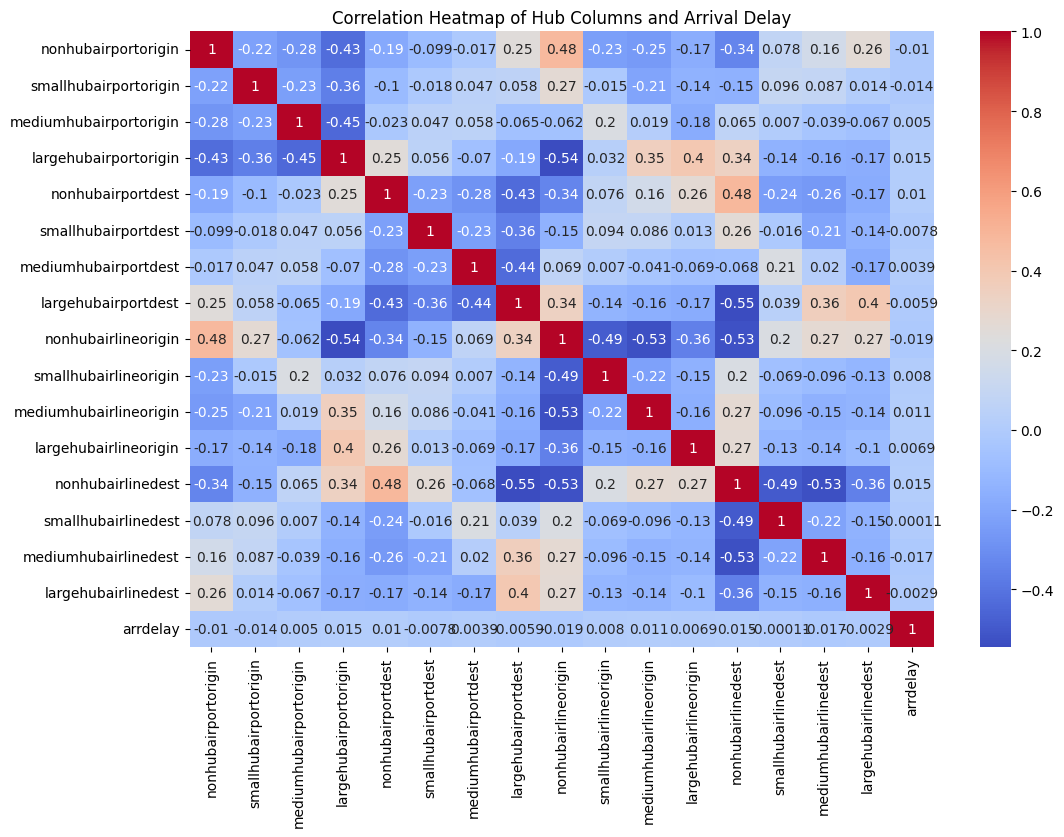

In [ ]:
# prompt: heat map for target variable arrdelay vs columns which have hub word in them

# Filter columns containing 'hub'
hub_columns = [col for col in flight_df.columns if 'hub' in col.lower()]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(flight_df[hub_columns + ['arrdelay']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Hub Columns and Arrival Delay')
plt.show()

In [ ]:
# prompt: drop columns depdelay, year

flight_df = flight_df.drop(['depdelay', 'year'], axis=1)



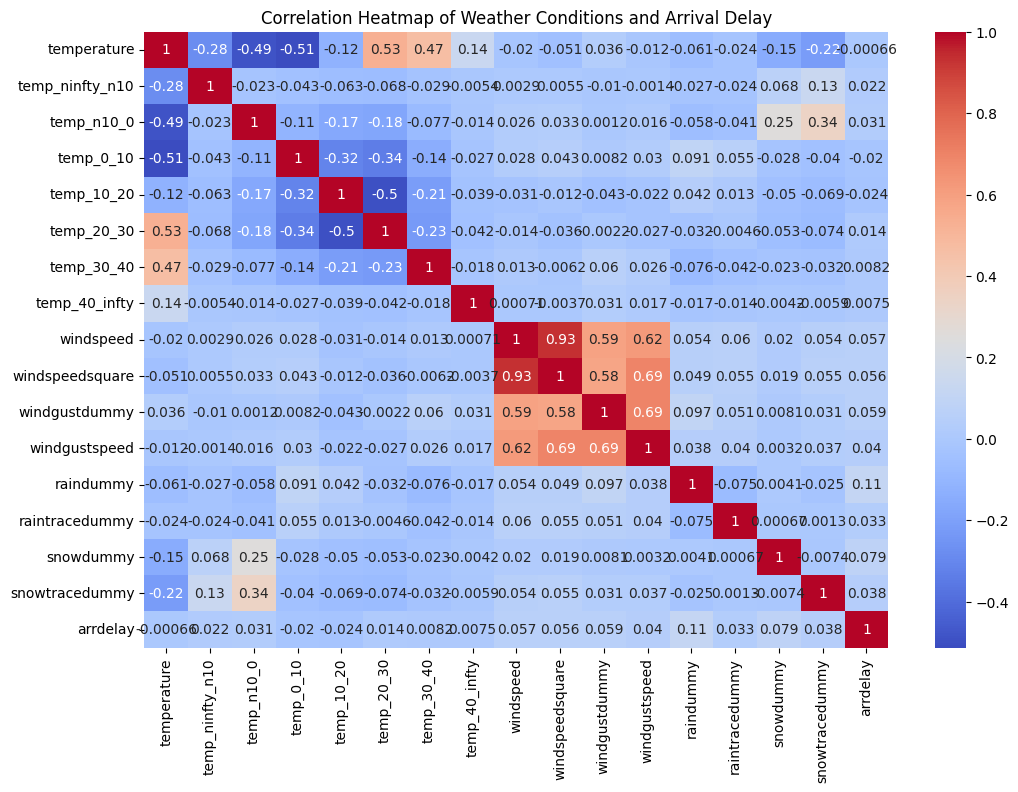

In [ ]:
# prompt: heatmap for target variable arrdelay vs all columns of weather conditions

# Assuming 'weather_conditions' are in columns like 'wind_speed', 'visibility', etc.
weather_columns = [col for col in flight_df.columns if 'wind' in col or 'rain' in col or 'snow' in col or 'temp' in col]

plt.figure(figsize=(12, 8))
sns.heatmap(flight_df[weather_columns + ['arrdelay']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Weather Conditions and Arrival Delay')
plt.show()

In [ ]:
# prompt: type of unique values in  uniquecarrier column and its count

print(flight_df['uniquecarrier'].value_counts())

uniquecarrier
WN    327951
DL    185012
OO    135814
EV     87823
UA     75620
B6     58039
XE     55224
US     52370
FL     38737
CO     38026
AA     35419
AS     35099
YV     25492
F9     21594
NW      9050
9E      6998
OH      6277
HA      2360
MQ      1553
Name: count, dtype: int64


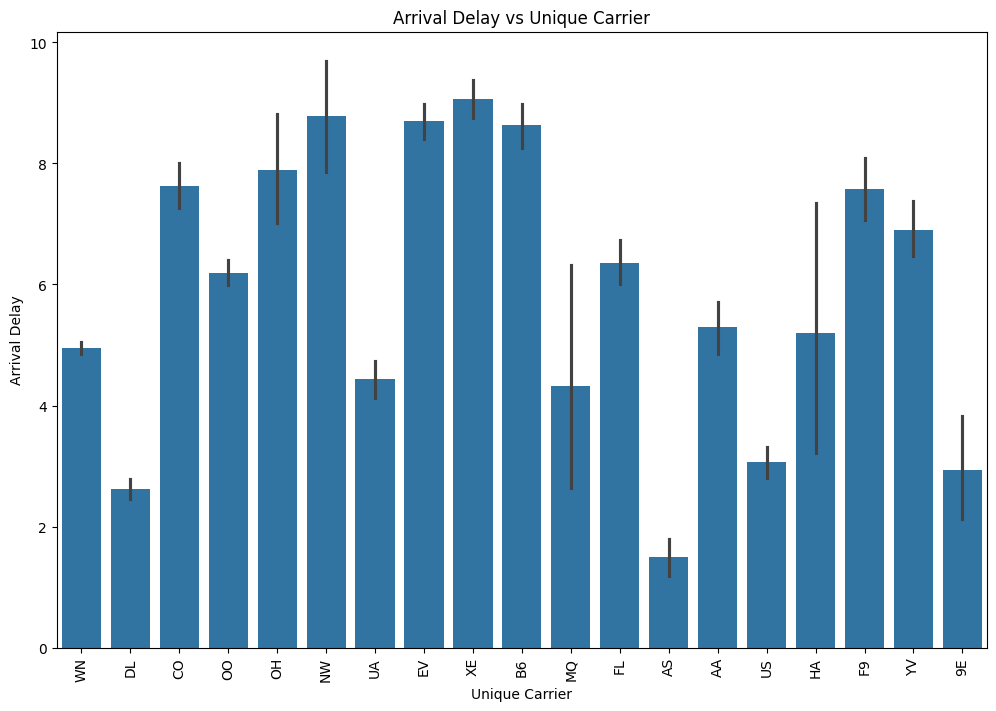

In [ ]:
# prompt: generate a unique array of unique carrier.then do a scatterplot against arrdelay

# Assuming 'uniquecarrier' column exists in your DataFrame
unique_carriers = flight_df['uniquecarrier'].unique()

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.barplot(x='uniquecarrier', y='arrdelay', data=flight_df)
plt.xlabel('Unique Carrier')
plt.ylabel('Arrival Delay')
plt.title('Arrival Delay vs Unique Carrier')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# prompt: number of unique tailnum

print(flight_df['tailnum'].nunique())

5388


In [ ]:
# prompt: table of unique tailnum and respective count

# Assuming 'flight_df' DataFrame is already loaded as in the provided code.

# Calculate unique tailnum counts
tailnum_counts = flight_df['tailnum'].value_counts().reset_index()
tailnum_counts.columns = ['tailnum', 'count']

# Display the table
tailnum_counts

,tailnum,count
0,N630WN,786
1,N641SW,770
2,N606SW,770
3,N616SW,769
4,N625SW,766
...,...,...
5383,N783UA,1
5384,N78003,1
5385,N119UA,1
5386,N508UA,1


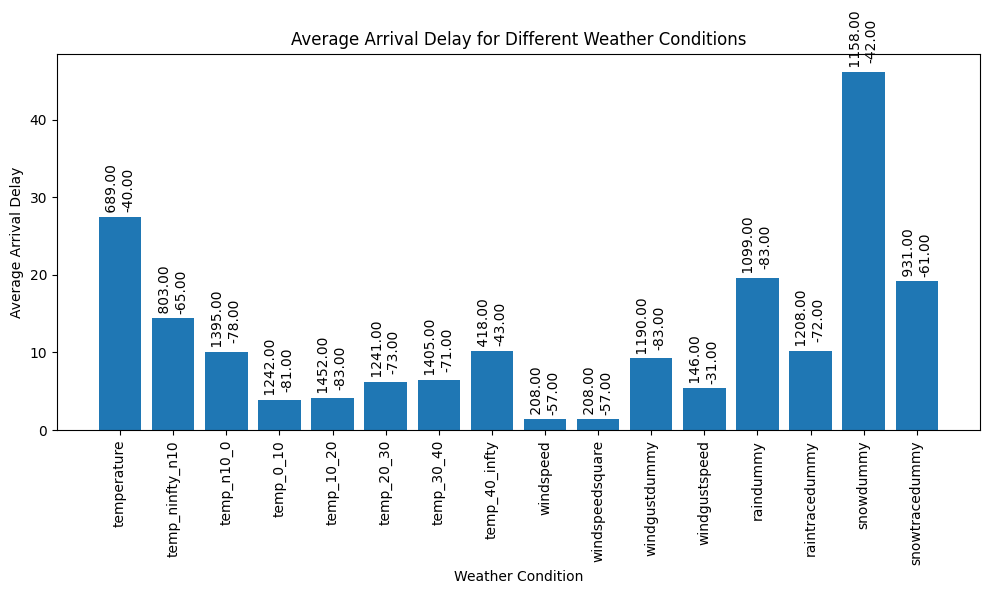

In [ ]:
# prompt: for columns which contain temp,rain,snow,wind in them, find out average of arrdelay values where the corresponding column value is 1 and plot a bar graph. for columns which contain temp,rain,snow,wind in them, find out max and min of arrdelay values where the corresponding column value is 1 and mark in bar plot with 90 rotation

# Assuming 'flight_df' DataFrame is already loaded as in the provided code.

weather_columns = [col for col in flight_df.columns if 'wind' in col or 'rain' in col or 'snow' in col or 'temp' in col]

# Create an empty dictionary to store results
weather_delay_stats = {}

# Iterate over relevant columns
for col in weather_columns:
    # Calculate the average arrdelay when the weather condition is 1
    avg_delay = flight_df[flight_df[col] == 1]['arrdelay'].mean()

    # Calculate the max and min arrdelay when the weather condition is 1
    max_delay = flight_df[flight_df[col] == 1]['arrdelay'].max()
    min_delay = flight_df[flight_df[col] == 1]['arrdelay'].min()

    weather_delay_stats[col] = {'average': avg_delay, 'max': max_delay, 'min': min_delay}

# Extract average delays for plotting
avg_delays = [stats['average'] for stats in weather_delay_stats.values()]


# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(weather_columns, avg_delays)
plt.xlabel("Weather Condition")
plt.ylabel("Average Arrival Delay")
plt.title("Average Arrival Delay for Different Weather Conditions")
plt.xticks(rotation=90)

# Add max and min values as text annotations on the bars
for i, bar in enumerate(bars):
    col_name = weather_columns[i]
    max_val = weather_delay_stats[col_name]['max']
    min_val = weather_delay_stats[col_name]['min']

    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f' {max_val:.2f}\n{min_val:.2f}',
             ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()

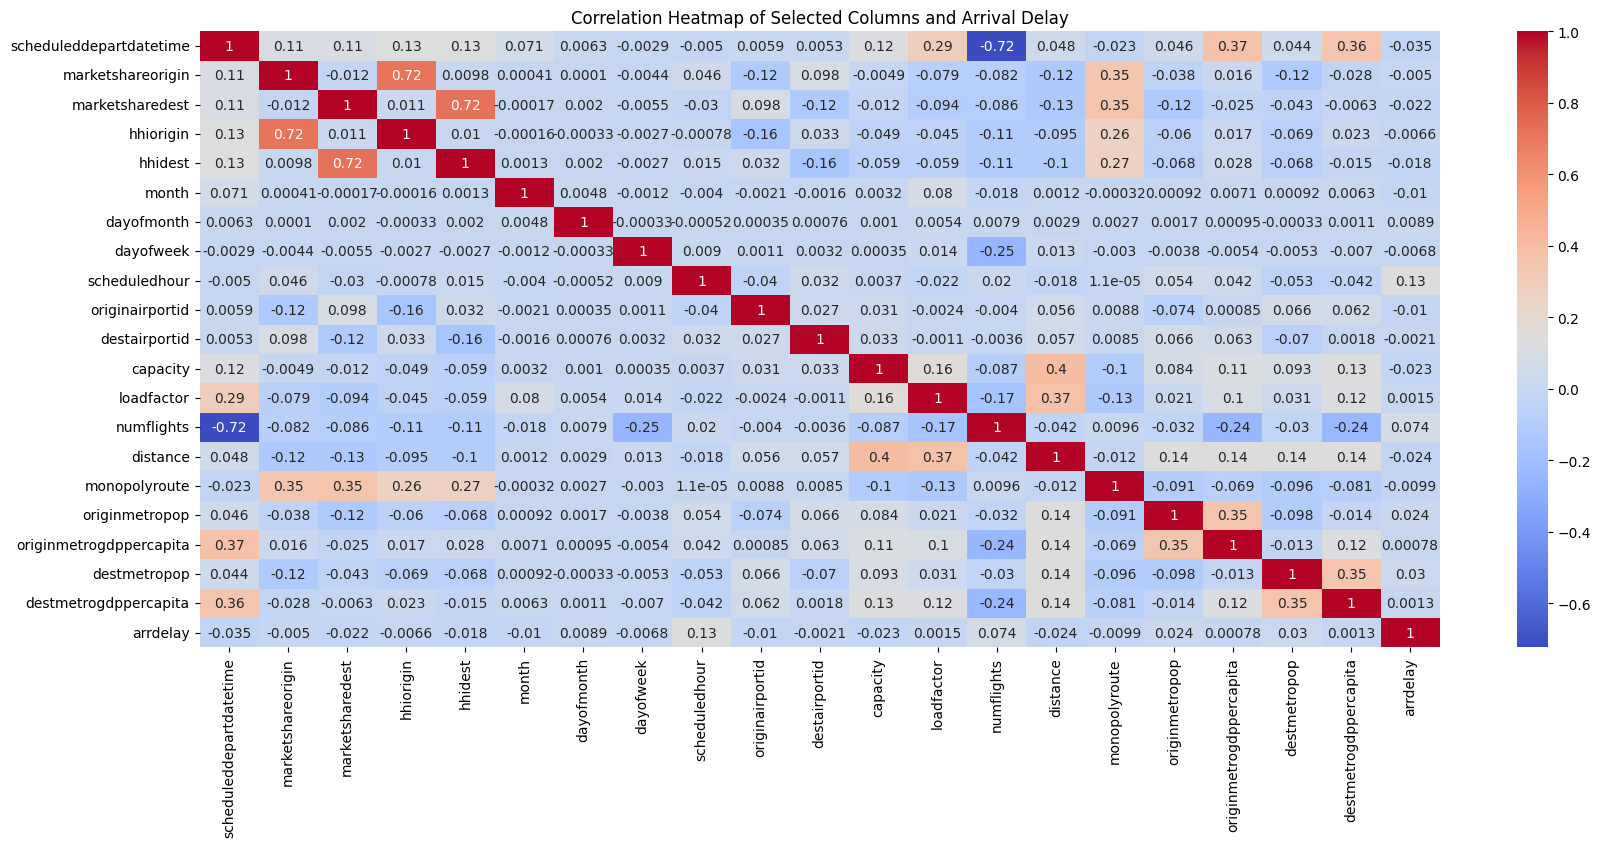

In [ ]:
# prompt: heatmap for all columns except depdelay,unique carrier,tailnum,origincityname,originstate,origin,dest or columns which have hub, temp, snow ,rain or wind in them

import matplotlib.pyplot as plt
import seaborn as sns

# Columns to exclude from the heatmap
exclude_columns = ['depdelay', 'uniquecarrier', 'tailnum', 'origincityname', 'originstate', 'origin', 'dest', 'arrdelay']
exclude_keywords = ['hub', 'temp', 'snow', 'rain', 'wind']

# Filter columns based on exclusion criteria
columns_to_use = [col for col in flight_df.columns
                  if col not in exclude_columns and
                  not any(keyword in col.lower() for keyword in exclude_keywords)]

# Add 'arrdelay' back to the columns to use for correlation with other columns
columns_to_use.append('arrdelay')

# Create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(flight_df[columns_to_use].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Columns and Arrival Delay')
plt.show()

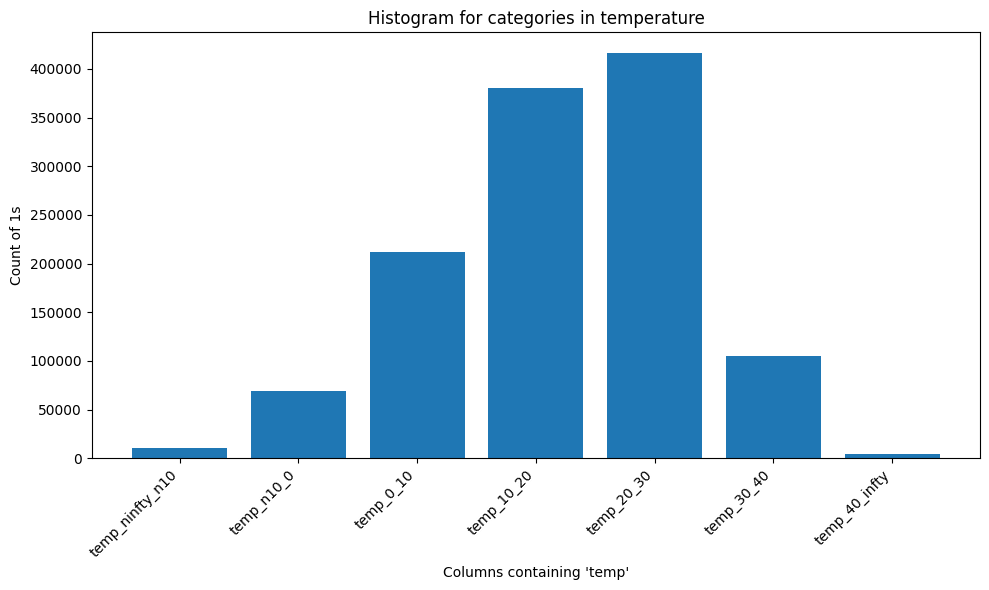

In [ ]:
# prompt: histogram: x axis - columns which contain  temp except temperature , y-axis is count of 1 in that column

import matplotlib.pyplot as plt

# Assuming 'flight_df' DataFrame is already loaded as in the provided code.

# Find columns containing 'temp' but not 'temperature'
temp_columns = [col for col in flight_df.columns if 'temp' in col.lower() and 'temperature' not in col.lower()]

# Create a dictionary to store the counts of 1s in each column
temp_counts = {}
for col in temp_columns:
    temp_counts[col] = (flight_df[col] == 1).sum()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(temp_counts.keys(), temp_counts.values())
plt.xlabel("Columns containing 'temp'")
plt.ylabel("Count of 1s")
plt.title("Histogram for categories in temperature")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

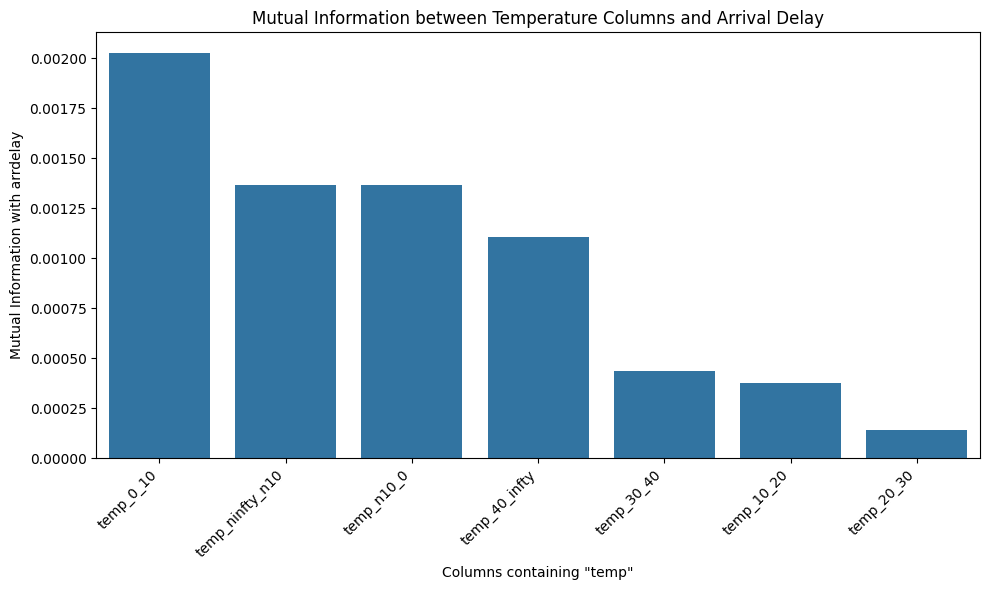

In [ ]:
# prompt: mutual information for target variable arrdelay for columns which contain temp and not temperature.then do a bar plot

import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'flight_df' DataFrame is already loaded as in the provided code.

# Find columns containing 'temp' but not 'temperature'
temp_columns = [col for col in flight_df.columns if 'temp' in col.lower() and 'temperature' not in col.lower()]

# Calculate mutual information
mutual_info = mutual_info_regression(flight_df[temp_columns], flight_df['arrdelay'])

# Create a DataFrame for better visualization
mutual_info_df = pd.DataFrame({'Column': temp_columns, 'Mutual Information': mutual_info})

# Sort the DataFrame by mutual information in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)


# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Mutual Information', data=mutual_info_df)
plt.xlabel('Columns containing "temp"')
plt.ylabel('Mutual Information with arrdelay')
plt.title('Mutual Information between Temperature Columns and Arrival Delay')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
flight_df.head()

,arrdelay,scheduleddepartdatetime,origin,dest,uniquecarrier,marketshareorigin,marketsharedest,hhiorigin,hhidest,nonhubairportorigin,smallhubairportorigin,mediumhubairportorigin,largehubairportorigin,nonhubairportdest,smallhubairportdest,mediumhubairportdest,largehubairportdest,nonhubairlineorigin,smallhubairlineorigin,mediumhubairlineorigin,largehubairlineorigin,nonhubairlinedest,smallhubairlinedest,mediumhubairlinedest,largehubairlinedest,month,dayofmonth,dayofweek,scheduledhour,originairportid,destairportid,tailnum,capacity,loadfactor,numflights,origincityname,originstate,distance,monopolyroute,temperature,temp_ninfty_n10,temp_n10_0,temp_0_10,temp_10_20,temp_20_30,temp_30_40,temp_40_infty,windspeed,windspeedsquare,windgustdummy,windgustspeed,raindummy,raintracedummy,snowdummy,snowtracedummy,originmetropop,originmetrogdppercapita,destmetropop,destmetrogdppercapita
0,-4.0,2004-01-08 15:25:00,ELP,SAT,WN,0.618467,0.407567,0.417090,0.226878,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,8,4,15,11540,14683,N686,2,0.460607,19.579,"El Paso, TX",TX,496,1,15.340000,0,0,0,1,0,0,0,10.300000,106.090000,0,0.0,0,0,0,0,702433,27314.633,1843927,35005.234
1,11.0,2004-01-22 14:40:00,ATL,MSY,DL,0.500757,0.096321,0.319589,0.196657,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,22,4,14,10397,13495,N110DL,2,0.617904,19.548,"Atlanta, GA",GA,425,0,11.500000,0,0,0,1,0,0,0,13.666667,186.777778,0,0.0,0,0,0,0,4802300,49081.773,1314721,48848.234
2,12.0,2004-01-29 12:25:00,DFW,JFK,DL,0.060898,0.131962,0.296126,0.214357,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,29,4,12,11298,12478,N933DL,142,0.455929,19.545,"Dallas/Fort Worth, TX",TX,1391,0,12.218868,0,0,0,1,0,0,0,13.528302,183.014952,0,0.0,0,0,0,0,5689982,50588.563,18747431,57295.402
3,24.0,2004-01-14 15:55:00,SEA,EWR,CO,0.040522,0.347744,0.234712,0.249377,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,14,3,15,14747,11618,N18243,149,0.534314,19.261,"Seattle, WA",WA,2401,0,9.000000,0,0,1,0,0,0,0,0.000000,0.000000,0,0.0,1,0,0,0,3163703,57755.547,18747431,57295.402
4,-8.0,2004-01-14 18:40:00,SLC,RNO,OO,0.506899,0.176493,0.341763,0.277364,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,14,3,18,14869,14570,N443SW,55,0.742125,19.261,"Salt Lake City, UT",UT,422,0,-11.466667,1,0,0,0,0,0,0,7.666667,58.777778,0,0.0,0,0,0,0,1030597,45043.602,385049,49079.727


In [ ]:
# prompt: convert temp_ninfty_n10	temp_n10_0	temp_0_10	temp_10_20	temp_20_30	temp_30_40	temp_40_infty columns into one column where  temp_ninfty_n10 is category 1,	temp_n10_0	is category 2,temp_0_10	is category 3,temp_10_20 is category 4,temp_20_30 is category 5,temp_30_40 is category 6,temp_40_infty is category 7

# Assuming 'flight_df' DataFrame is already loaded as in the provided code.

# Find columns containing 'temp' but not 'temperature'
temp_columns = [col for col in flight_df.columns if 'temp' in col.lower() and 'temperature' not in col.lower()]

# Create a new column 'temperature_category'
flight_df['temperature_category'] = 0  # Initialize with a default value

# Assign categories based on the temperature columns
for i, col in enumerate(temp_columns):
    flight_df.loc[flight_df[col] == 1, 'temperature_category'] = i + 1

# Now 'temperature_category' column contains the categories as required.
# The original temp columns can be dropped if not needed anymore.
# flight_df = flight_df.drop(columns=temp_columns)

print(flight_df[['temperature_category'] + temp_columns].head(20))

    temperature_category  temp_ninfty_n10  temp_n10_0  temp_0_10  temp_10_20  \
0                      4                0           0          0           1   
1                      4                0           0          0           1   
2                      4                0           0          0           1   
3                      3                0           0          1           0   
4                      1                1           0          0           0   
5                      3                0           0          1           0   
6                      3                0           0          1           0   
7                      2                0           1          0           0   
8                      4                0           0          0           1   
9                      2                0           1          0           0   
10                     4                0           0          0           1   
11                     3                

In [ ]:
flight_df.head()

,arrdelay,scheduleddepartdatetime,origin,dest,uniquecarrier,marketshareorigin,marketsharedest,hhiorigin,hhidest,nonhubairportorigin,smallhubairportorigin,mediumhubairportorigin,largehubairportorigin,nonhubairportdest,smallhubairportdest,mediumhubairportdest,largehubairportdest,nonhubairlineorigin,smallhubairlineorigin,mediumhubairlineorigin,largehubairlineorigin,nonhubairlinedest,smallhubairlinedest,mediumhubairlinedest,largehubairlinedest,month,dayofmonth,dayofweek,scheduledhour,originairportid,destairportid,tailnum,capacity,loadfactor,numflights,origincityname,originstate,distance,monopolyroute,temperature,temp_ninfty_n10,temp_n10_0,temp_0_10,temp_10_20,temp_20_30,temp_30_40,temp_40_infty,windspeed,windspeedsquare,windgustdummy,windgustspeed,raindummy,raintracedummy,snowdummy,snowtracedummy,originmetropop,originmetrogdppercapita,destmetropop,destmetrogdppercapita,temperature_category
0,-4.0,2004-01-08 15:25:00,ELP,SAT,WN,0.618467,0.407567,0.417090,0.226878,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,8,4,15,11540,14683,N686,2,0.460607,19.579,"El Paso, TX",TX,496,1,15.340000,0,0,0,1,0,0,0,10.300000,106.090000,0,0.0,0,0,0,0,702433,27314.633,1843927,35005.234,4
1,11.0,2004-01-22 14:40:00,ATL,MSY,DL,0.500757,0.096321,0.319589,0.196657,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,22,4,14,10397,13495,N110DL,2,0.617904,19.548,"Atlanta, GA",GA,425,0,11.500000,0,0,0,1,0,0,0,13.666667,186.777778,0,0.0,0,0,0,0,4802300,49081.773,1314721,48848.234,4
2,12.0,2004-01-29 12:25:00,DFW,JFK,DL,0.060898,0.131962,0.296126,0.214357,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,29,4,12,11298,12478,N933DL,142,0.455929,19.545,"Dallas/Fort Worth, TX",TX,1391,0,12.218868,0,0,0,1,0,0,0,13.528302,183.014952,0,0.0,0,0,0,0,5689982,50588.563,18747431,57295.402,4
3,24.0,2004-01-14 15:55:00,SEA,EWR,CO,0.040522,0.347744,0.234712,0.249377,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,14,3,15,14747,11618,N18243,149,0.534314,19.261,"Seattle, WA",WA,2401,0,9.000000,0,0,1,0,0,0,0,0.000000,0.000000,0,0.0,1,0,0,0,3163703,57755.547,18747431,57295.402,3
4,-8.0,2004-01-14 18:40:00,SLC,RNO,OO,0.506899,0.176493,0.341763,0.277364,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,14,3,18,14869,14570,N443SW,55,0.742125,19.261,"Salt Lake City, UT",UT,422,0,-11.466667,1,0,0,0,0,0,0,7.666667,58.777778,0,0.0,0,0,0,0,1030597,45043.602,385049,49079.727,1


In [ ]:
# prompt: mutual information regression between arrdelay and temperature category

# Assuming 'flight_df' DataFrame is already loaded and 'temperature_category' is created as in the previous code.

# Calculate mutual information
mutual_info = mutual_info_regression(flight_df[['temperature_category']], flight_df['arrdelay'])

print(f"Mutual Information between temperature category and arrival delay: {mutual_info[0]}")

In [ ]:
# prompt: categorise arrdelay in bins and create a new column

# Assuming 'flight_df' DataFrame and 'arrdelay' column exist.

# Define bin edges
bin_edges = [-float('inf'), -15, 0, 15, 30, 60, float('inf')]  # Example bin edges

# Define bin labels
bin_labels = ['Extreme Early', 'Early', 'On Time', 'Minor Delay', 'Moderate Delay', 'Significant Delay']

# Create the new column 'arrdelay_category'
flight_df['arrdelay_category'] = pd.cut(flight_df['arrdelay'], bins=bin_edges, labels=bin_labels, right=False)

# Print some rows to verify the categorization
print(flight_df[['arrdelay', 'arrdelay_category']].head(20))

In [ ]:
# prompt: mutual information calssification between arrdelay_category and temperature_category

from sklearn.metrics import mutual_info_score

# Assuming 'flight_df' DataFrame and 'arrdelay_category', 'temperature_category' columns exist.

# Convert categorical columns to numerical representations (if necessary)
flight_df['arrdelay_category'] = pd.factorize(flight_df['arrdelay_category'])[0]
flight_df['temperature_category'] = pd.factorize(flight_df['temperature_category'])[0]

# Calculate mutual information
mutual_info = mutual_info_score(flight_df['arrdelay_category'], flight_df['temperature_category'])

print(f"Mutual Information between arrdelay_category and temperature_category: {mutual_info}")

In [ ]:
flight_df.head()

In [ ]:
flight_df.info()

In [ ]:
# prompt: drop column unique carrier and tailnum

flight_df = flight_df.drop(['uniquecarrier', 'tailnum'], axis=1)

In [ ]:
flight_df.info()

In [ ]:
# prompt: find out categorical columns and do one hot encoding for everything

# Assuming 'flight_df' DataFrame is already loaded and processed as in your provided code.

# Identify categorical columns (excluding those already processed)
categorical_cols = flight_df.select_dtypes(include=['object']).columns

# Perform one-hot encoding on the identified categorical columns
flight_df = pd.get_dummies(flight_df, columns=categorical_cols, drop_first=True)

print(flight_df.head())

In [ ]:
flight_df.info()

In [ ]:
# prompt: convert the bool to 0 and 1

# Assuming 'flight_df' DataFrame and boolean columns exist.

# Replace True with 1 and False with 0 in all boolean columns
for col in flight_df.select_dtypes(include=bool).columns:
    flight_df[col] = flight_df[col].astype(int)

In [ ]:
flight_df.head()

In [ ]:
flight_df.columns

In [ ]:
col = ['scheduleddepartdatetime']
flight_df = flight_df.drop(col, axis=1)

In [ ]:
# # prompt: rf regressor run on this

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming 'flight_df' DataFrame is already loaded and preprocessed as in the previous code.

# # Define features (X) and target (y)
# X = flight_df.drop('arrdelay', axis=1)
# y = flight_df['arrdelay']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the RandomForestRegressor model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
# rf_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = rf_model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

In [ ]:
# prompt: xgboost algorithm on this

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'flight_df' DataFrame is already loaded and preprocessed as in the previous code.

# Define features (X) and target (y)
X = flight_df.drop('arrdelay', axis=1)
y = flight_df['arrdelay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
# prompt: catboost algorithm on this dataset

!pip install catboost

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Assuming 'flight_df' DataFrame is already loaded and preprocessed as in the previous code.

# Define features (X) and target (y)
X = flight_df.drop('arrdelay', axis=1)
y = flight_df['arrdelay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=10)
# You can adjust hyperparameters like iterations, learning_rate, depth, etc.
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
# prompt: adaboost on this

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'flight_df' DataFrame is already loaded and preprocessed as in the previous code.

# Define features (X) and target (y)
X = flight_df.drop('arrdelay', axis=1)
y = flight_df['arrdelay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the AdaBoost model with a DecisionTreeRegressor as the base estimator
ada_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
flight_df